**Assignment 1: Single-Qubit Variational Ground State (Warm-Up)**

Question

Consider a single-qubit Hamiltonian given by

𝐻
=
𝑍
H=Z

where
𝑍
Z is the Pauli-Z operator.

Construct a single-qubit variational quantum circuit using PennyLane with one parameterized rotation gate to estimate the ground state energy of the Hamiltonian using a variational approach. Measure the expectation value
⟨
𝑍
⟩
⟨Z⟩, use a classical optimizer to minimize it, plot the energy as a function of optimization iterations, and report the minimum energy obtained.

In [1]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


In [2]:
# Device
dev = qml.device("default.qubit", wires=1)


In [3]:
# QNode with explicit interface
@qml.qnode(dev, interface="autograd")
def circuit(theta):
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

In [4]:

def cost(theta):
    return circuit(theta)


In [5]:
# Optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.2)

In [6]:
# Non-zero initialization
theta = np.array(0.5)
energies = []


In [7]:
# Optimization
for i in range(100):
    theta = opt.step(cost, theta)
    energies.append(cost(theta))

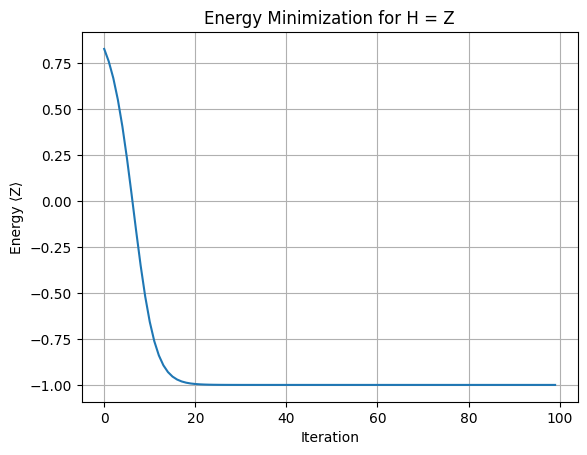

In [8]:
# Plot
plt.plot(energies)
plt.xlabel("Iteration")
plt.ylabel("Energy ⟨Z⟩")
plt.title("Energy Minimization for H = Z")
plt.grid()
plt.show()


In [9]:
print("Final energy:", energies[-1])

Final energy: -1.0
